In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

### Loading Dataset

In [11]:
wh_df = pd.read_csv('worldHappinessReport.csv')

In [13]:
wh_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.


### Checking for NULL values

In [41]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

we have no null values in dataaset

### Checking for Outliers

Text(0.5, 1.0, 'Family')

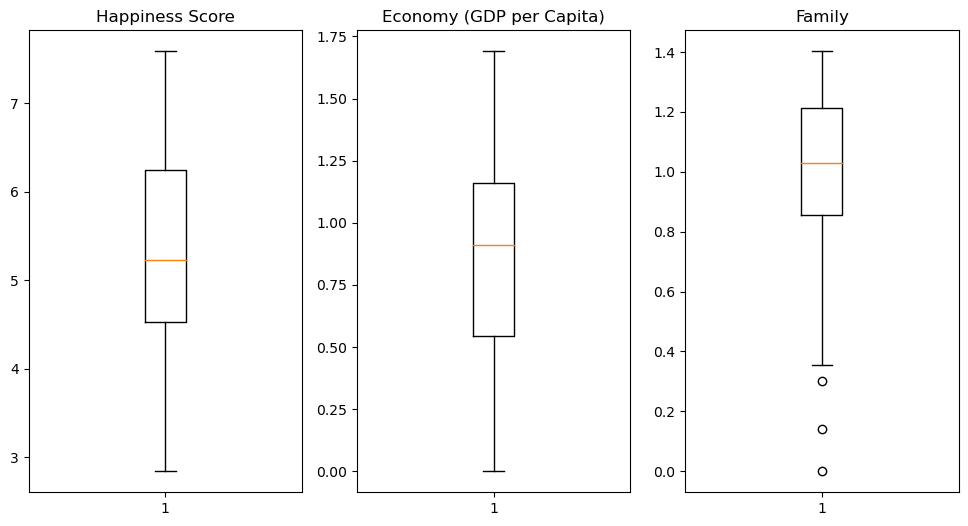

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Boxplot for low-priced products
ax[0].boxplot(wh_df['Happiness Score'])
ax[0].set_title('Happiness Score')


ax[1].boxplot(wh_df['Economy (GDP per Capita)'])
ax[1].set_title('Economy (GDP per Capita)')

# Boxplot for high-priced products
ax[2].boxplot(wh_df['Family'])
ax[2].set_title('Family')


although we have not outliear in our dataset, just considers them rare case 

### Happiness Score Destribution

/Users/ahadmoeen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


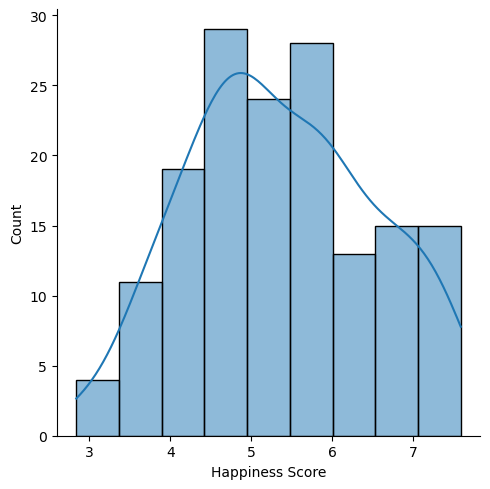

In [136]:
sns.displot(wh_df['Happiness Score'], kde=True)

#### in Regions

In [96]:
wh_df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

### Happiness by Region

<Axes: xlabel='Region'>

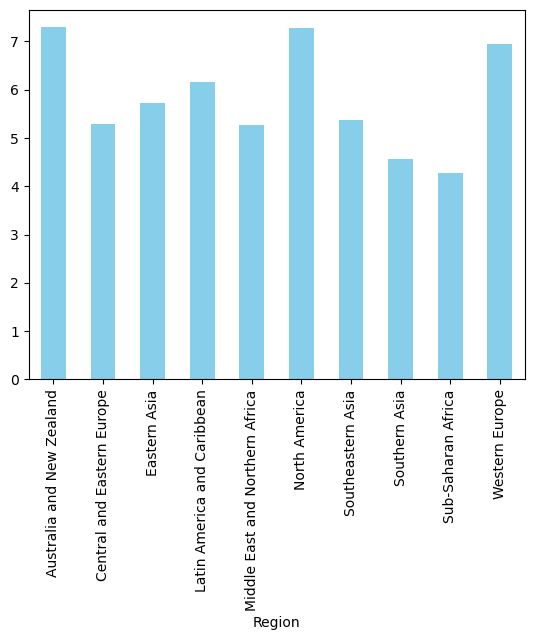

In [62]:
happiness_by_region = wh_df.groupby('Region')['Happiness Score'].median()
happiness_by_region.plot(kind='bar', color='skyblue')

### 10 most Happiest Country

In [132]:
happiestCountry = wh_df[(wh_df['Happiness Rank'] <= 10) & (wh_df['Happiness Rank'] >= 0)]
happiestCountry

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### what makes greatest role to make them happy?

In [144]:
numeric_df = wh_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()


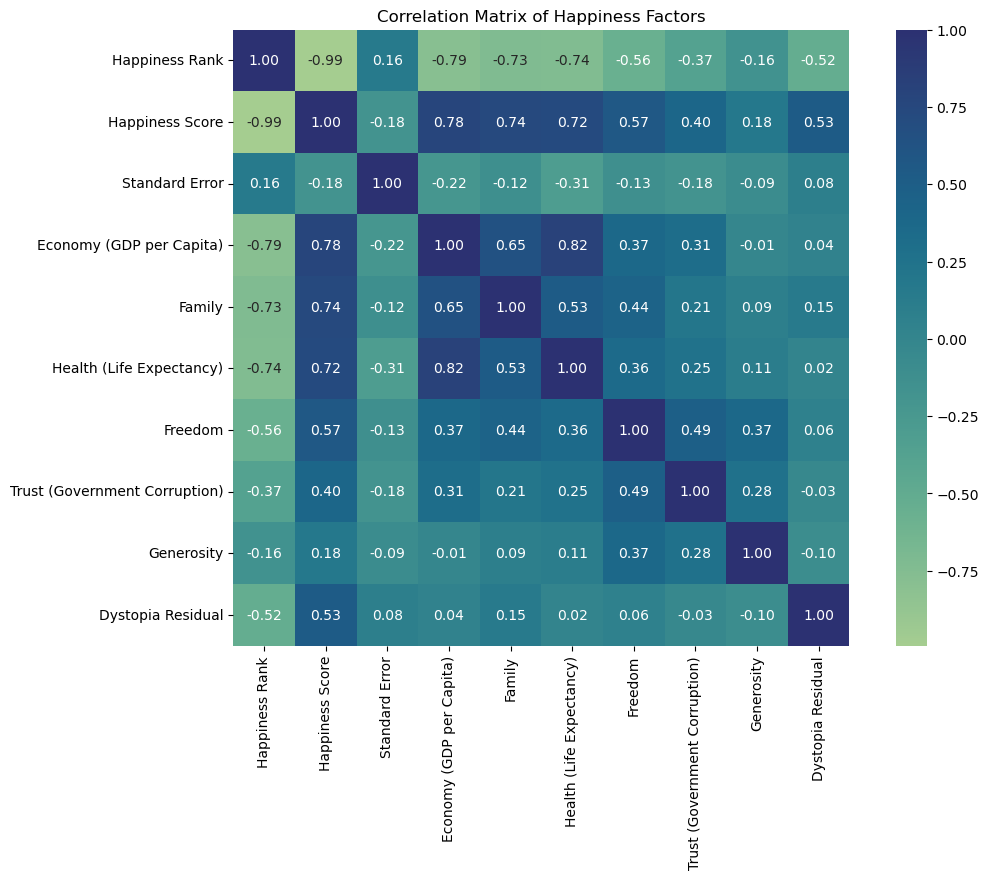

In [150]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', square=True)
plt.title('Correlation Matrix of Happiness Factors')
plt.show()

### Decision Tree

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree 

In [229]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Step 1: Standardize the data before applying PCA
scaler = StandardScaler()
wh_df_scaled = scaler.fit_transform(wh_df[['Economy (GDP per Capita)', 'Family', 
                                           'Health (Life Expectancy)', 'Freedom', 
                                           'Trust (Government Corruption)',]])

# Step 2: Apply PCA (choosing 2 components here, but you can adjust as needed)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(wh_df_scaled)

# Step 3: Create a new DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 4: Output the explained variance ratio to understand how much variance is captured
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0] * 100:.2f}%")
print(f"Explained Variance by PC2: {explained_variance[1] * 100:.2f}%")

Explained Variance by PC1: 56.35%
Explained Variance by PC2: 20.71%


In [231]:
# Select features and target
X_pca = pca_df[['PC1', 'PC2']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)


In [241]:
# Create and train the model
model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [243]:
# Make predictions
y_pred = model.predict(X_test)


In [245]:
# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.44237718338034926
R² Score: 0.688192441100162


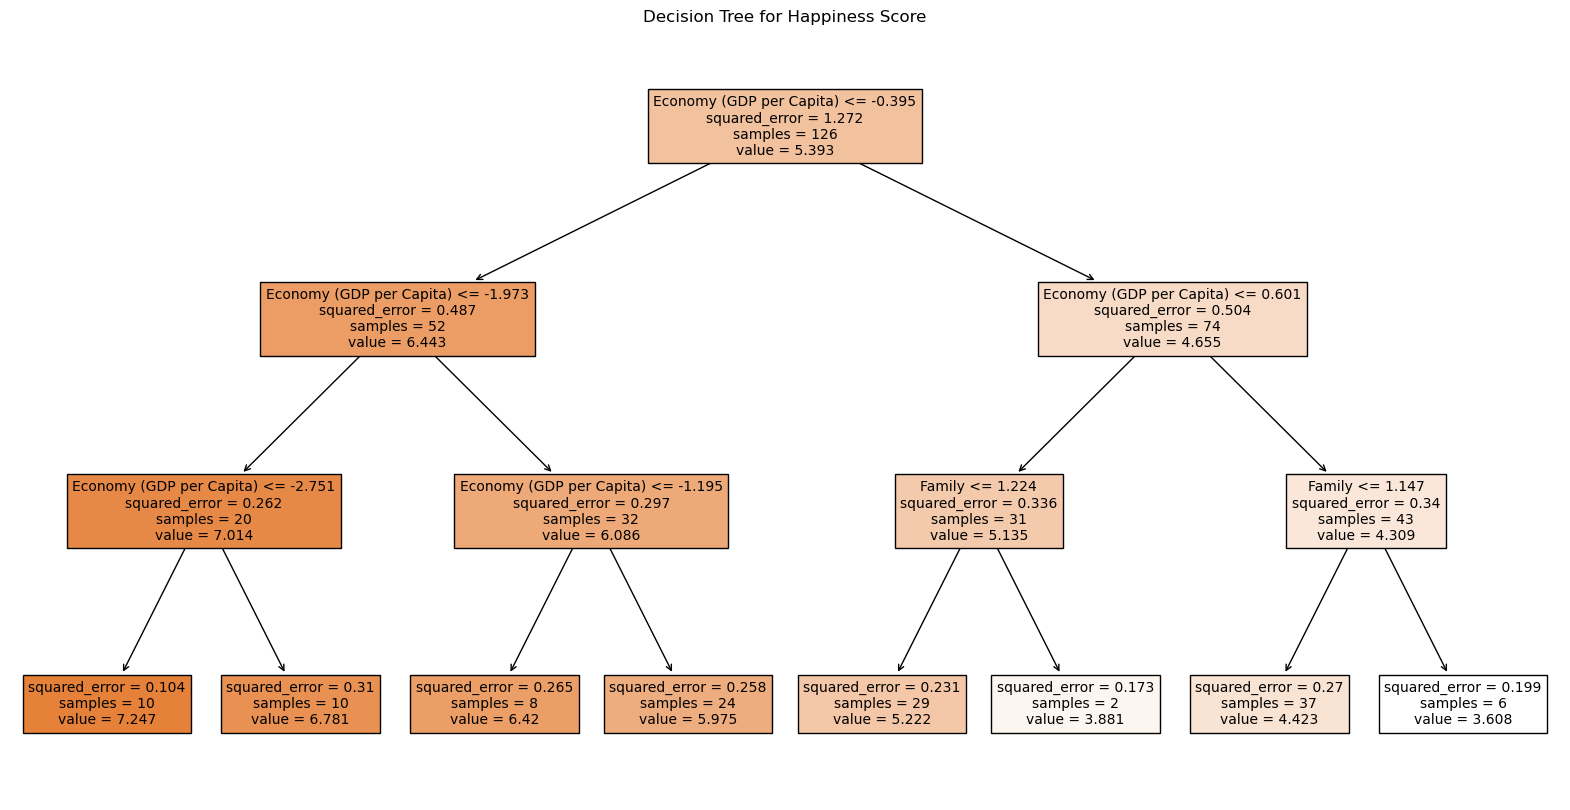

In [247]:
plt.figure(figsize=(20, 10)) 
tree.plot_tree(model, feature_names=features.columns.tolist(), filled=True, fontsize=10)
plt.title('Decision Tree for Happiness Score')
plt.show()
